In [2]:
library(tidyverse, warn.conflicts = FALSE)

# library to read matlab data formats into R
library(reshape2)
library(lubridate)
library(viridis)
library(oce)

In [3]:
HPLC <- read.csv("../../DATA/HPLC_SizePigments.csv")

In [4]:
#HPLC[HPLC<0] <- NA
#HPLC[,-2][HPLC>100000000] <- NA

In [5]:
#HPLC[,c(-1:-3, -11)][HPLC>10000] <- NA

In [6]:
head(HPLC,n=100)

,X,Date_time_UTC,depth,Fuco,Perid,Allo,But_fuco,Hex_fuco,Zea,Tot_Chl_b,DP,Tot_Chl_a,TChl,dataset
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,0,1995-12-13 08:11:00,1,0.008,0.005,NA,0.002,0.008,0.004,0.018,NA,0.107,NA,BBRS
2,1,1995-12-13 08:11:00,7,0.009,0.006,0.001,0.002,0.010,0.008,0.025,NA,0.139,NA,BBRS
3,2,1995-12-13 08:11:00,15,0.008,0.010,0.001,0.003,0.011,0.008,0.032,NA,0.163,NA,BBRS
4,3,1995-12-13 08:11:00,25,0.065,0.008,0.006,0.021,0.086,0.024,0.141,NA,0.408,NA,BBRS
5,4,1995-12-13 08:11:00,35,0.034,0.009,0.002,0.010,0.042,0.012,0.107,NA,0.241,NA,BBRS
6,5,1995-12-13 08:11:00,55,0.009,NA,NA,0.003,0.011,0.005,0.053,NA,0.088,NA,BBRS
7,6,1995-12-13 08:11:00,75,0.007,0.002,NA,0.004,0.013,0.004,0.032,NA,0.051,NA,BBRS
8,7,1995-12-13 08:11:00,100,0.002,NA,NA,NA,0.003,0.001,0.005,NA,0.014,NA,BBRS
9,8,1996-01-12 08:35:00,1,0.694,0.080,0.004,0.002,0.034,0.008,0.087,NA,1.145,NA,BBRS


# interpolate data to 100 m and 2 depth intervals

In [7]:
# Function to read specific verfication type from dataset

prepdataframe <- function(data, variable){
    DF <- data
    DF$date <- as.Date(DF$Date_time_UTC)
        
    VarDF <- DF %>%
      select(date, all_of(variable), depth) %>%
      gather(key='key',value = "value", -date, -depth)
    
    return(VarDF)
}

In [8]:
# Interpolate
interpolateDF <- function(DF, func){
    zz <- seq(0, 100, 1)
    
    if(func=='linear'){
        IntDF <- DF %>%
            group_by(date) %>%
            filter(sum(!is.na(value))>3) %>%
            do(data.frame(value_int = with(.,approx(depth, value, zz)), depth = zz)) 
        
        IntDF <- IntDF %>% 
              rename(
                value_int = value_int.y
                )
        IntDF$value_int.x <- NULL
        }
    
    else if(func=='oce-rr'){
        IntDF <- DF %>%
            group_by(depth, date) %>%
            summarize(value=mean(value, na.rm=TRUE)) %>%
            ungroup() %>%
            group_by(date) %>%
            do(data.frame(value_int = with(.,oceApprox(depth, value, zz, "rr")), depth = zz)) 
        }
    
    return(IntDF)
}

In [9]:
interpolateVAR <- function(data, var, depth_to=100, depth_from=0, int_func='oce-rr', noofNA=90){
 
    dat <- prepdataframe(data, var)
    #print(dat)
    int <- interpolateDF(dat, int_func)   
    #print(int)
    sum <- int %>%
        group_by(date) %>%
        filter(sum(is.na(value_int))<noofNA) %>%
        filter(depth_from<=depth & depth<=depth_to) %>%
        summarize(value_sum = sum(value_int, na.rm=TRUE), 
                  var = mean(value_int, na.rm=TRUE),
                  NAs = sum(is.na(value_int)), .groups="keep")
    
    #_sum_monthly <- niskin_sum %>%
    #      mutate(time_month = format(date, format="%m-%Y"))
    
    return(sum)
}

In [10]:
# head(interpolateVAR(HPLC, 'Fuco', 'oce-rr', noofNA=20), n=45)

In [11]:
# check why time coverage is weird
# check those gigantic outliers (where do they come from?)


In [12]:
HPLC[100:140,]

,X,Date_time_UTC,depth,Fuco,Perid,Allo,But_fuco,Hex_fuco,Zea,Tot_Chl_b,DP,Tot_Chl_a,TChl,dataset
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
100,99,1996-12-11 09:20:00,55,0.009,NA,0.001,0.004,0.010,0.006,0.129,NA,0.067,NA,BBRS
101,100,1996-12-11 09:20:00,75,0.010,NA,0.003,0.009,0.023,0.020,0.141,NA,0.114,NA,BBRS
102,101,1996-12-11 09:20:00,100,0.004,NA,0.001,0.003,0.007,0.004,0.059,NA,0.029,NA,BBRS
103,102,1997-01-07 09:30:00,1,1.500,0.042,NA,0.009,0.034,0.016,0.091,NA,3.484,NA,BBRS
104,103,1997-01-07 09:30:00,7,1.827,0.037,NA,0.013,0.049,0.022,0.103,NA,3.892,NA,BBRS
105,104,1997-01-07 09:30:00,15,1.611,0.041,NA,0.012,0.038,0.023,0.105,NA,3.633,NA,BBRS
106,105,1997-01-07 09:30:00,25,1.084,0.083,NA,0.011,0.041,0.022,0.081,NA,2.599,NA,BBRS
107,106,1997-01-07 09:30:00,35,0.025,0.004,0.003,0.006,0.027,0.033,0.053,NA,0.182,NA,BBRS
108,107,1997-01-07 09:30:00,55,0.014,0.001,0.002,0.006,0.018,0.019,0.034,NA,0.104,NA,BBRS


In [13]:
tail(HPLC,n=900)

,X,Date_time_UTC,depth,Fuco,Perid,Allo,But_fuco,Hex_fuco,Zea,Tot_Chl_b,DP,Tot_Chl_a,TChl,dataset
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
699,145,2008-02-12 09:30:00,7,0.096,0.022,0.037,0.030,0.183,0.113,0.127,0.608,1.070,1.391,HPL
700,146,2008-02-12 09:30:00,15,0.098,0.020,0.038,0.030,0.183,0.113,0.126,0.608,1.073,1.392,HPL
701,147,2008-02-12 09:30:00,20,0.067,0.034,0.029,0.036,0.174,0.076,0.148,0.564,0.958,1.283,HPL
702,148,2008-02-12 09:30:00,25,0.075,0.029,0.031,0.030,0.168,0.089,0.128,0.550,0.954,1.254,HPL
703,149,2008-02-12 09:30:00,35,0.051,0.028,0.010,0.032,0.076,0.016,0.103,0.316,0.404,0.607,HPL
704,150,2008-02-12 09:30:00,55,0.026,0.002,0.001,0.009,0.019,0.002,0.027,0.086,0.089,0.146,HPL
705,151,2008-02-12 09:30:00,55,0.025,0.002,0.001,0.009,0.019,0.002,0.026,0.084,0.088,0.141,HPL
706,152,2008-02-12 09:30:00,75,0.020,NA,NA,0.009,0.022,0.002,0.036,0.089,0.080,0.145,HPL
707,153,2008-02-12 09:30:00,100,0.009,NA,NA,0.001,0.003,0.001,0.004,0.018,0.023,0.033,HPL


`summarise()` has grouped output by 'depth'. You can override using the `.groups` argument.



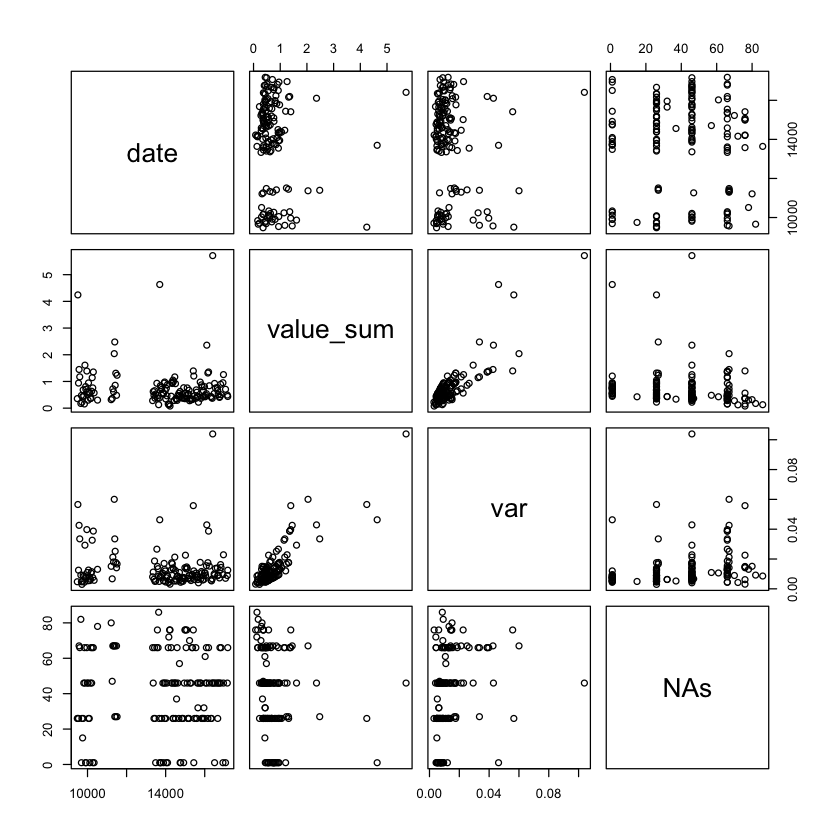

In [14]:
plot(interpolateVAR(HPLC, 'Perid', 'oce-rr', noofNA=90))

In [15]:
niskin_numeric = c( 
                'Fuco',
                'Perid',
                'Allo',
                'But_fuco',
                'Hex_fuco',
                'Zea',
                'Tot_Chl_b',
                'DP',
                'Tot_Chl_a',
                'TChl')

In [16]:
#require(purrr)
#require(dplyr)

options(dplyr.summarise.inform=F)

m100_temp_store = list()

for (variable in niskin_numeric) {
    #print(variable)
    dat <- interpolateVAR(HPLC, variable)
    #print(tail(dat))
    m100_temp_store[[variable]] <- data.frame(dat_var = dat$var, date = dat$date)
    names(m100_temp_store[[variable]])[1] <- variable
    #print(tail(niskin_temp_store[[variable]]))
}

HPLC_100m <- m100_temp_store %>% 
    reduce(full_join, by = "date")



m55_temp_store = list()

for (variable in niskin_numeric) {
    #print(variable)
    dat <- interpolateVAR(HPLC, variable, depth_to=55, depth_from=0)
    #print(tail(dat))
    m55_temp_store[[variable]] <- data.frame(dat_var = dat$var, date = dat$date)
    names(m55_temp_store[[variable]])[1] <- variable
    #print(tail(niskin_temp_store[[variable]]))
}

HPLC_55m <- m55_temp_store %>% 
    reduce(full_join, by = "date")



m55to100_temp_store = list()

for (variable in niskin_numeric) {
    #print(variable)
    dat <- interpolateVAR(HPLC, variable, depth_to=100, depth_from=55)
    #print(tail(dat))
    m55to100_temp_store[[variable]] <- data.frame(dat_var = dat$var, date = dat$date)
    names(m55to100_temp_store[[variable]])[1] <- variable
    #print(tail(niskin_temp_store[[variable]]))
}

HPLC_55to100m <- m55to100_temp_store %>% 
    reduce(full_join, by = "date")

# write interpolated data to CSV

In [17]:
write.csv(HPLC_100m, "../../DATA/February/HPLC_100m.csv")
write.csv(HPLC_55m, "../../DATA/February/HPLC_55m.csv")
write.csv(HPLC_55to100m, "../../DATA/February/HPLC_55to100m.csv")

In [90]:
#tail(interpolateVAR(HPLC, 'Perid', 'oce-rr', noofNA=90), n=45)

In [ ]:
Documents/GitHub/BennyPhD/CaRiaco/SCRIPPS/CARIACO_data/Manuscript2DataAnalysis/DATA/February